In [291]:
# [1] 모듈 준비
import pandas as pd
import numpy as np

In [292]:
file_name='catch_stats.csv'

In [293]:
catchDF=pd.read_csv(file_name)

In [294]:
# [4] 데이터 확인
# - 기본 정보 확인
catchDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   last_name, first_name  1387 non-null   object 
 1   player_id              1387 non-null   int64  
 2   year                   1387 non-null   int64  
 3   pop_2b_sba             63 non-null     float64
 4   pop_2b_cs              62 non-null     float64
 5   pop_3b_sba             58 non-null     float64
 6   pop_3b_cs              39 non-null     float64
 7   exchange_2b_3b_sba     63 non-null     float64
 8   maxeff_arm_2b_3b_sba   63 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 97.6+ KB


In [295]:
print(catchDF.head(), catchDF.tail(), sep='\n\n')

  last_name, first_name  player_id  year  pop_2b_sba  pop_2b_cs  pop_3b_sba  \
0         Hunter, Torii     116338  2015         NaN        NaN         NaN   
1          Ortiz, David     120074  2015         NaN        NaN         NaN   
2       Rodriguez, Alex     121347  2015         NaN        NaN         NaN   
3       Ramirez, Aramis     133380  2015         NaN        NaN         NaN   
4        Beltré, Adrian     134181  2015         NaN        NaN         NaN   

   pop_3b_cs  exchange_2b_3b_sba  maxeff_arm_2b_3b_sba  
0        NaN                 NaN                   NaN  
1        NaN                 NaN                   NaN  
2        NaN                 NaN                   NaN  
3        NaN                 NaN                   NaN  
4        NaN                 NaN                   NaN  

     last_name, first_name  player_id  year  pop_2b_sba  pop_2b_cs  \
1382           Winn, Masyn     691026  2024         NaN        NaN   
1383      Chourio, Jackson     694192  202

In [296]:
# [5] 데이터 전처리
# [5-1] 결측치 체크
catchDF.isna().sum()


last_name, first_name       0
player_id                   0
year                        0
pop_2b_sba               1324
pop_2b_cs                1325
pop_3b_sba               1329
pop_3b_cs                1348
exchange_2b_3b_sba       1324
maxeff_arm_2b_3b_sba     1324
dtype: int64

### -이러한 모든 지표들은 트랙맨 기술을 사용하여 측정

### -기존 사용 용도는 탄도 측정기 -> 군사용 시스템

### -트랙맨으로 야구공을 측정할 시 타구의 속도, 비거리, 각도, 강도 등 여러 데이터 측정 가능

In [297]:
# - 설정값: 정상데이터가 지정된 갯수 미만이면 삭제
cleanDF=catchDF.dropna(thresh=5)
cleanDF

,"last_name, first_name",player_id,year,pop_2b_sba,pop_2b_cs,pop_3b_sba,pop_3b_cs,exchange_2b_3b_sba,maxeff_arm_2b_3b_sba
16,"Molina, Yadier",425877,2015,1.97,1.98,1.60,NaN,0.74,83.7
24,"Martin, Russell",431145,2015,1.97,1.98,1.47,1.48,0.74,86.2
29,"McCann, Brian",435263,2015,2.05,2.07,1.68,1.66,0.75,79.0
55,"Posey III, Buster",457763,2015,2.05,2.06,1.60,1.60,0.75,82.1
65,"Cervelli, Francisco",465041,2015,2.01,2.01,1.61,1.66,0.74,81.2
...,...,...,...,...,...,...,...,...,...
1342,"Rutschman, Adley",668939,2024,1.97,1.98,1.50,1.52,0.71,84.7
1343,"Langeliers, Shea",669127,2024,1.90,1.87,1.42,NaN,0.64,86.3
1344,"Smith, Will",669257,2024,1.93,1.92,NaN,NaN,0.62,82.9
1353,"Diaz, Yainer",673237,2024,1.96,1.91,1.47,1.46,0.73,86.8


In [298]:
# 기본 통계 분석
cleanDF.describe()

,player_id,year,pop_2b_sba,pop_2b_cs,pop_3b_sba,pop_3b_cs,exchange_2b_3b_sba,maxeff_arm_2b_3b_sba
count,63.000000,63.000000,63.000000,62.000000,58.000000,39.000000,63.000000,63.000000
mean,566276.857143,2019.666667,1.971270,1.967258,1.542069,1.562821,0.703333,82.963492
std,85214.779686,3.326337,0.064044,0.063895,0.088333,0.157412,0.042159,2.932537
min,425877.000000,2015.000000,1.810000,1.820000,1.400000,1.340000,0.600000,76.300000
25%,518735.000000,2016.000000,1.935000,1.930000,1.472500,1.480000,0.680000,81.100000
50%,575929.000000,2020.000000,1.970000,1.970000,1.550000,1.540000,0.710000,83.000000
75%,661763.500000,2023.000000,2.015000,2.010000,1.600000,1.615000,0.740000,84.750000
max,681351.000000,2024.000000,2.100000,2.110000,1.840000,2.290000,0.790000,88.400000


In [299]:
# 인덱스를 선수명으로 변경
New_clean_DF=  cleanDF.set_index('last_name, first_name')

In [300]:
New_clean_DF.rename(columns={'pop_2b_sba':' 2루도루 시 팝타임','pop_2b_cs':'2루 아웃 팝타임','pop_3b_sba':'3루 도루 팝타임',
                             'pop_3b_cs':'3루 아웃 팝타임','maxeff_arm_2b_3b_sba':'평균 팔 강도','exchange_2b_3b_sba':'반응속도'}
                             ,inplace=True)

In [301]:
New_clean_DF

,player_id,year,2루도루 시 팝타임,2루 아웃 팝타임,3루 도루 팝타임,3루 아웃 팝타임,반응속도,평균 팔 강도
"last_name, first_name",,,,,,,,
"Molina, Yadier",425877,2015,1.97,1.98,1.60,NaN,0.74,83.7
"Martin, Russell",431145,2015,1.97,1.98,1.47,1.48,0.74,86.2
"McCann, Brian",435263,2015,2.05,2.07,1.68,1.66,0.75,79.0
"Posey III, Buster",457763,2015,2.05,2.06,1.60,1.60,0.75,82.1
"Cervelli, Francisco",465041,2015,2.01,2.01,1.61,1.66,0.74,81.2
...,...,...,...,...,...,...,...,...
"Rutschman, Adley",668939,2024,1.97,1.98,1.50,1.52,0.71,84.7
"Langeliers, Shea",669127,2024,1.90,1.87,1.42,NaN,0.64,86.3
"Smith, Will",669257,2024,1.93,1.92,NaN,NaN,0.62,82.9


In [302]:
New_clean_DF.describe()

,player_id,year,2루도루 시 팝타임,2루 아웃 팝타임,3루 도루 팝타임,3루 아웃 팝타임,반응속도,평균 팔 강도
count,63.000000,63.000000,63.000000,62.000000,58.000000,39.000000,63.000000,63.000000
mean,566276.857143,2019.666667,1.971270,1.967258,1.542069,1.562821,0.703333,82.963492
std,85214.779686,3.326337,0.064044,0.063895,0.088333,0.157412,0.042159,2.932537
min,425877.000000,2015.000000,1.810000,1.820000,1.400000,1.340000,0.600000,76.300000
25%,518735.000000,2016.000000,1.935000,1.930000,1.472500,1.480000,0.680000,81.100000
50%,575929.000000,2020.000000,1.970000,1.970000,1.550000,1.540000,0.710000,83.000000
75%,661763.500000,2023.000000,2.015000,2.010000,1.600000,1.615000,0.740000,84.750000
max,681351.000000,2024.000000,2.100000,2.110000,1.840000,2.290000,0.790000,88.400000


In [303]:
# 2. 상관관계 분석
New_clean_DF.corr()

# 각 주자 2루시도 팝타임과 2루 아웃 팝타임 = 0.94 / 주자 3루시도 팝타임과 3루 아웃 팝타임 0.879로 매우 높은 상관관계 지니고있음

# 팝타임은 주로 1.8초에서 2.0초 사이가 좋은 수치
# 이 시간이 짧다는 뜻은 포수는 더 빠르게 공을 잡고 던지는 데 성공하며, 이는 주자를 아웃으로 만드는 능력이 높은 것을 의미합니다.


,player_id,year,2루도루 시 팝타임,2루 아웃 팝타임,3루 도루 팝타임,3루 아웃 팝타임,반응속도,평균 팔 강도
player_id,1.000000,0.803248,-0.357636,-0.472789,-0.339972,-0.091835,-0.458095,0.189575
year,0.803248,1.000000,-0.286445,-0.383091,-0.318072,-0.089524,-0.573915,0.051974
2루도루 시 팝타임,-0.357636,-0.286445,1.000000,0.941545,0.700669,0.395154,0.548577,-0.765621
2루 아웃 팝타임,-0.472789,-0.383091,0.941545,1.000000,0.656164,0.296597,0.446931,-0.769386
3루 도루 팝타임,-0.339972,-0.318072,0.700669,0.656164,1.000000,0.879963,0.397510,-0.713142
3루 아웃 팝타임,-0.091835,-0.089524,0.395154,0.296597,0.879963,1.000000,0.155817,-0.522869
반응속도,-0.458095,-0.573915,0.548577,0.446931,0.397510,0.155817,1.000000,-0.098148
평균 팔 강도,0.189575,0.051974,-0.765621,-0.769386,-0.713142,-0.522869,-0.098148,1.000000


In [304]:
# 5. 추세 분석
# 연도별 어깨 힘 지표의 평균 변화
# groupby  ==> numeric에서 사용가능하다
armdata = New_clean_DF.groupby('year')['평균 팔 강도'].mean()
sort_arm = armdata.sort_values(ascending=False)     # 내림차순
print("\n연도별 평균 팔 강도 변화:")
print(sort_arm)


연도별 maxeff_arm_2b_3b_sba의 평균 변화:
year
2017    85.150000
2021    84.550000
2024    83.530000
2022    83.250000
2018    83.083333
2016    82.737500
2019    82.500000
2023    82.410000
2015    82.133333
2020    82.125000
Name: 평균 팔 강도, dtype: float64


In [305]:
# 10년간 포수 각 수비 데이터 평균 추출
New_clean_DF.mean()

player_id      566276.857143
year             2019.666667
 2루도루 시 팝타임         1.971270
2루 아웃 팝타임           1.967258
3루 도루 팝타임           1.542069
3루 아웃 팝타임           1.562821
반응속도                0.703333
평균 팔 강도            82.963492
dtype: float64

In [315]:
New_clean_DF.sort_values('반응속도').head(10)

,player_id,year,2루도루 시 팝타임,2루 아웃 팝타임,3루 도루 팝타임,3루 아웃 팝타임,반응속도,평균 팔 강도
"last_name, first_name",,,,,,,,
"Realmuto, J.T.",592663,2023,1.83,1.83,1.40,1.36,0.60,86.6
"Smith, Will",669257,2023,1.91,1.97,1.51,1.49,0.61,82.8
"Smith, Will",669257,2024,1.93,1.92,NaN,NaN,0.62,82.9
"Perez, Salvador",521692,2023,1.98,1.97,1.51,1.44,0.63,80.0
"Langeliers, Shea",669127,2024,1.90,1.87,1.42,NaN,0.64,86.3
"Contreras, William",661388,2024,1.96,1.93,1.60,1.72,0.64,82.5
"Contreras, William",661388,2023,1.95,1.95,1.60,NaN,0.65,81.9
"Rutschman, Adley",668939,2023,1.91,1.92,1.46,NaN,0.65,85.3
"Perez, Salvador",521692,2024,2.02,2.02,1.43,1.43,0.65,80.6


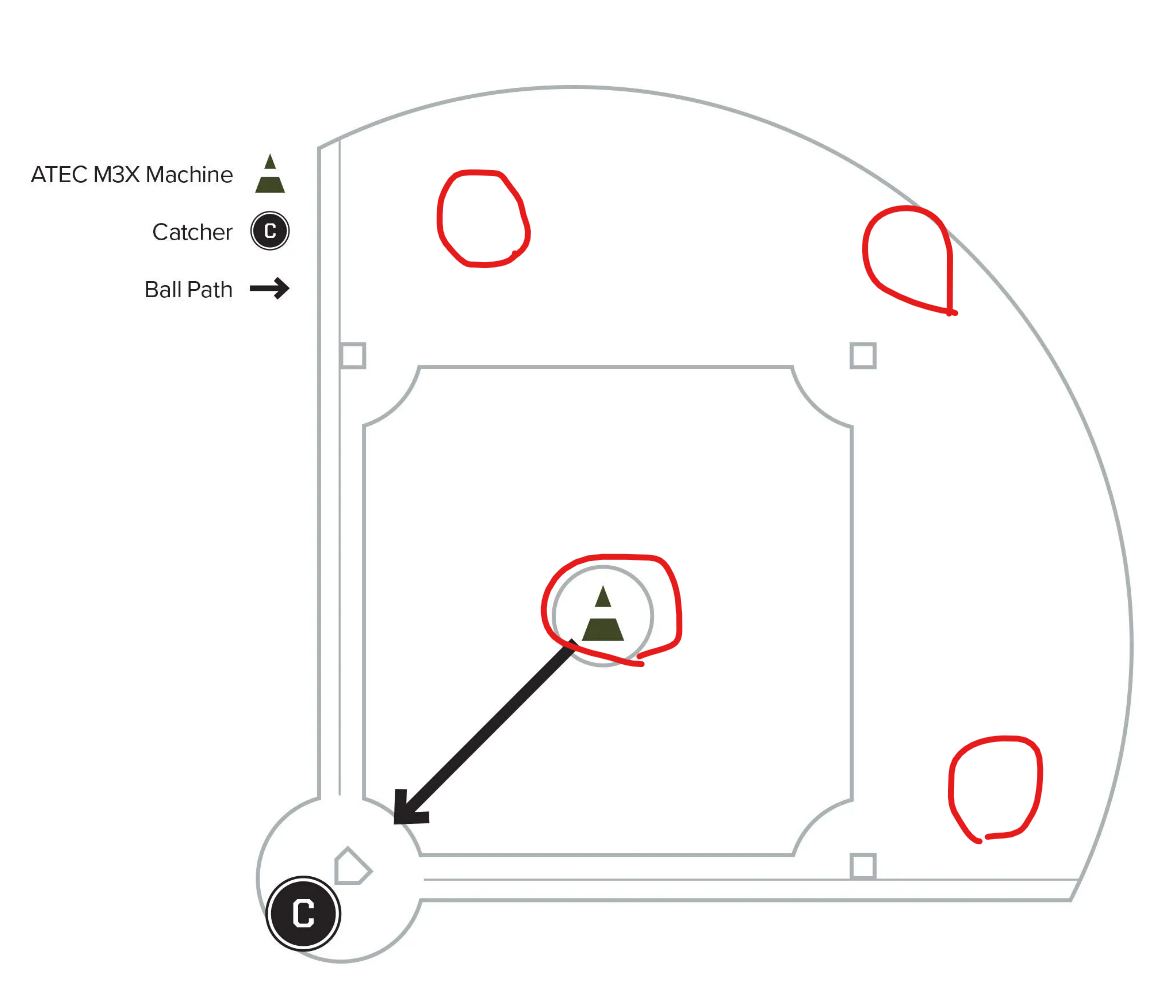

### 2023 년부터 ATEC 머신을 이용하여 브레이킹 볼을 58피트 또는 59피트 날아가게 하여
### 플레이트에 닿기 직전에 떨어뜨리는 훈련을 도입
### 이 훈련 도입 이후 포수들의 반응속도가 과거에 비해 빨라졌을거라는 예측


In [316]:
# 2015년 포수 지표
catch2015=New_clean_DF[New_clean_DF['year']==2015]
catch2015.sort_values(by='2루 아웃 팝타임',ascending=True)

,player_id,year,2루도루 시 팝타임,2루 아웃 팝타임,3루 도루 팝타임,3루 아웃 팝타임,반응속도,평균 팔 강도
"last_name, first_name",,,,,,,,
"Perez, Salvador",521692,2015,1.96,1.95,1.43,1.40,0.71,84.0
"Molina, Yadier",425877,2015,1.97,1.98,1.60,NaN,0.74,83.7
"Martin, Russell",431145,2015,1.97,1.98,1.47,1.48,0.74,86.2
"Norris, Derek",519083,2015,1.98,1.98,1.59,1.61,0.70,81.1
"Cervelli, Francisco",465041,2015,2.01,2.01,1.61,1.66,0.74,81.2
"Ramos, Wilson",467092,2015,2.01,2.02,1.58,NaN,0.75,83.5
"Vogt, Stephen",519390,2015,2.08,2.05,1.61,1.63,0.75,78.4
"Posey III, Buster",457763,2015,2.05,2.06,1.60,1.60,0.75,82.1
"McCann, Brian",435263,2015,2.05,2.07,1.68,1.66,0.75,79.0


In [307]:
# 2015 골든글러브 수상자 추출
AmeGold=catch2015.iloc[0]
NatGold=catch2015.loc['Perez, Salvador']

In [308]:
# 2015년 포수 골든 글러브 수상자
AmeGoldDF = pd.DataFrame(AmeGold)
NatGoldDF = pd.DataFrame(NatGold)
Gold2015 = pd.concat([AmeGoldDF, NatGoldDF], axis=1)
Gold2015

,"Molina, Yadier","Perez, Salvador"
player_id,425877.00,521692.00
year,2015.00,2015.00
2루도루 시 팝타임,1.97,1.96
2루 아웃 팝타임,1.98,1.95
3루 도루 팝타임,1.60,1.43
3루 아웃 팝타임,NaN,1.40
반응속도,0.74,0.71
평균 팔 강도,83.70,84.00


https://www.mlb.com/video/statcast-perez-s-top-pop-time-c1868553483?partnerId=web_video-playback-page_video-share


https://youtu.be/7tNQ_frAOjQ?si=P_1BJQ4ssFVM3tbo

In [309]:
# 2016년 포수 지표
catch2016=New_clean_DF[New_clean_DF['year']==2016]
catch2016.sort_values(by='2루 아웃 팝타임',ascending=True)

,player_id,year,2루도루 시 팝타임,2루 아웃 팝타임,3루 도루 팝타임,3루 아웃 팝타임,반응속도,평균 팔 강도
"last_name, first_name",,,,,,,,
"Realmuto, J.T.",592663,2016,1.91,1.92,1.46,NaN,0.70,87.0
"Perez, Salvador",521692,2016,1.94,1.93,1.51,1.52,0.67,83.9
"Molina, Yadier",425877,2016,1.96,1.94,1.64,1.58,0.70,83.6
"Martin, Russell",431145,2016,2.02,1.99,1.55,1.53,0.77,84.2
"Lucroy, Jonathan",518960,2016,2.01,2.01,1.58,1.55,0.73,81.1
"Posey III, Buster",457763,2016,2.03,2.02,1.62,1.54,0.76,83.6
"Ramos, Wilson",467092,2016,2.04,2.05,1.59,1.61,0.76,82.2
"Vogt, Stephen",519390,2016,2.10,2.11,1.66,NaN,0.71,76.3


In [310]:
# 2016 골든글러브 수상자 추출
AmeGold2016=catch2016.loc['Perez, Salvador']
NatGold2016=catch2016.loc['Posey III, Buster']

# 버스터포지상 대학야구 최고 포수 

In [311]:
# 2016년 포수 골든 글러브 수상자
AmeGoldDF16 = pd.DataFrame(AmeGold)
NatGoldDF16 = pd.DataFrame(NatGold)
Gold2016 = pd.concat([AmeGoldDF, NatGoldDF], axis=1)
Gold2016

,"Molina, Yadier","Perez, Salvador"
player_id,425877.00,521692.00
year,2015.00,2015.00
2루도루 시 팝타임,1.97,1.96
2루 아웃 팝타임,1.98,1.95
3루 도루 팝타임,1.60,1.43
3루 아웃 팝타임,NaN,1.40
반응속도,0.74,0.71
평균 팔 강도,83.70,84.00


In [312]:
# 2024년 포수 지표
catch2024=New_clean_DF[New_clean_DF['year']==2024]
catch2024.sort_values(by='2루 아웃 팝타임',ascending=True)

,player_id,year,2루도루 시 팝타임,2루 아웃 팝타임,3루 도루 팝타임,3루 아웃 팝타임,반응속도,평균 팔 강도
"last_name, first_name",,,,,,,,
"Langeliers, Shea",669127,2024,1.90,1.87,1.42,NaN,0.64,86.3
"Diaz, Yainer",673237,2024,1.96,1.91,1.47,1.46,0.73,86.8
"Smith, Will",669257,2024,1.93,1.92,NaN,NaN,0.62,82.9
"Contreras, William",661388,2024,1.96,1.93,1.60,1.72,0.64,82.5
"Heim, Jonah",641680,2024,1.96,1.97,1.53,1.50,0.68,83.4
"Raleigh, Cal",663728,2024,1.95,1.97,1.50,1.53,0.66,84.5
"O'Hoppe, Logan",681351,2024,2.02,1.97,1.61,1.65,0.74,84.0
"Rutschman, Adley",668939,2024,1.97,1.98,1.50,1.52,0.71,84.7
"Perez, Salvador",521692,2024,2.02,2.02,1.43,1.43,0.65,80.6


In [313]:
# 시즌이 아직 절반밖에 지나지 않았지만 굉장히 좋은 수비 지표를 보여주고 있는 선수
catch2024.loc['Langeliers, Shea']

player_id      669127.00
year             2024.00
 2루도루 시 팝타임         1.90
2루 아웃 팝타임           1.87
3루 도루 팝타임           1.42
3루 아웃 팝타임            NaN
반응속도                0.64
평균 팔 강도            86.30
Name: Langeliers, Shea, dtype: float64

### 포수가 경기에서 사실상 가장 유의미한 지표임 2루 아웃 팝타임으로 정리를 하였음


### 예전부터 팝타임은 1.8초에서 2.0초 사이가 좋은 수치로 평가 받아 왔는데 


### 최근 10년간 수비부분에서 좋은 성적을 올린 선수들은 1.8초 ~ 2.0초의 팝타임을 기록하고 있음

### 24년 올해는 렝겔리어스 선수가 좋은 지표를 기록하고 있으며 남은 절반도 지금과 같은 성적을 보여준다면
### 수상을 기대해도 될만할 것 같습니다
